<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/02wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. Imports

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120

# 2. Seaborn (간단히)

`-` 개념차이 

- matplotlib: 벡터 친화적
- seaborn: 데이터프레임 친화적

`-` 데이터프레임 친화적인 시각화 툴이 왜 강력한가?

- 분석할 데이터가 태뷸러데이터 형식인 경우가 많다.
- matplotlib은 여전히 강력하지만, seaborn등 데이터프레임 친화적 패키지가 우수한 경우가 많다. 

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

Text(0.5, 1.0, 'Titanic')

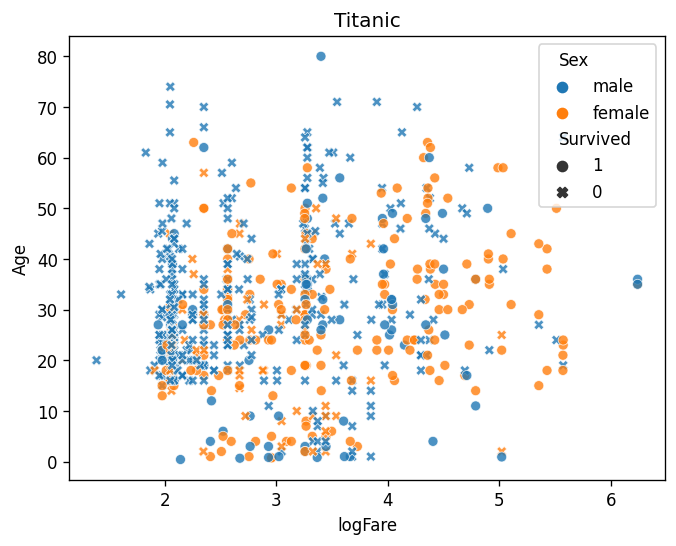

In [44]:
sns.scatterplot(
    df,
    x='logFare',
    y='Age',
    hue='Sex',
    style='Survived',style_order=[1,0],
    alpha=0.8
)
ax = plt.gca()
ax.set_title("Titanic")

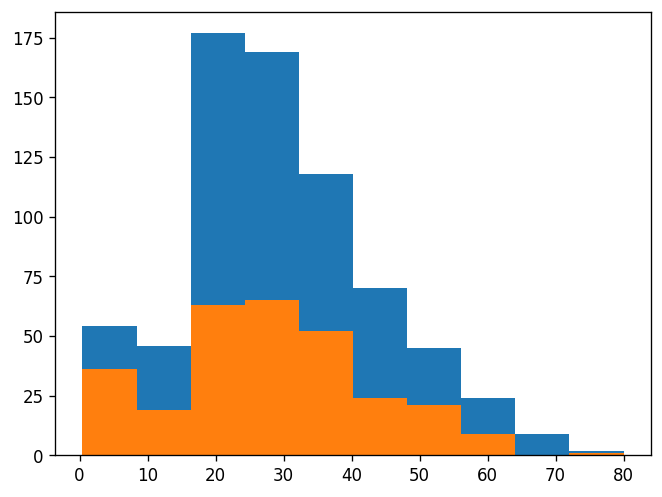

In [45]:
plt.hist(df.Age);
plt.hist(df.Age[df.Survived==1]);

`-` seaborn은 데이터과학에서 거의 표준시각화 패키지임. 머신러닝 입문서적, 경진대회에서 빠짐없이 등장. **그러나 우리는 하지 않겠어요.**

1. 다른 수업에서 해요.
2. 간단한 시각화는 오히려 matplotlib이 유리해요.
3. 보통 matplotlib이 더 본질적인 이해를 도와줘요. 즉 seaborn에 대한 아주 고급기능은 오히려 matplotlib에 대한 통찰이 있어야 가능해요. 
4. 제 생각에는 plotnine을 배우는게 더 좋아요 (더 우수함 + ggplot2도 같이 배워짐)
5. 최근에는 plotly가 모든면에서 seaborn을 압도하는 추세임. 

`-` `3`의 예시

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

Text(0.5, 0.98, 'TITANIC')

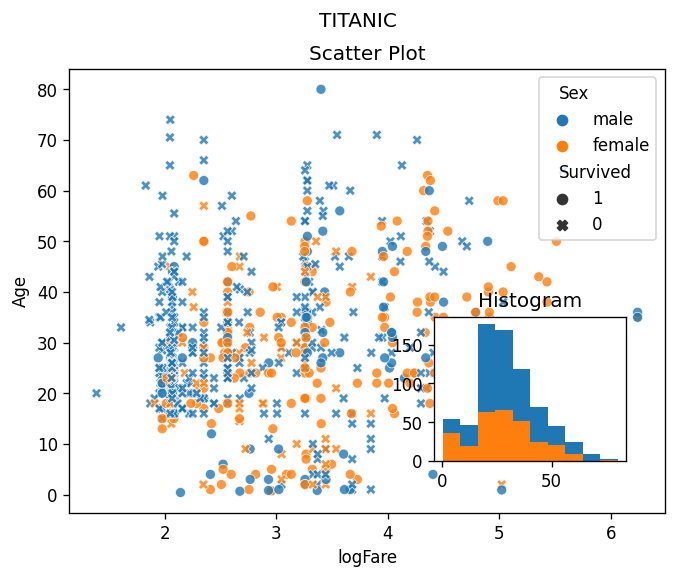

In [25]:
sns.scatterplot(
    df,
    x='logFare',
    y='Age',
    hue='Sex',
    style='Survived',style_order=[1,0],
    alpha=0.8
)
fig = plt.gcf()
ax = plt.gca()
ax.set_title('Scatter Plot')
fig.add_axes([0.6,0.2,0.25,0.25])
ax_mini = plt.gca()
ax_mini.hist(df.Age)
ax_mini.hist(df.Age[df.Survived==1])
ax_mini.set_title('Histogram')
fig.suptitle('TITANIC')

# 3. 훌륭한 시각화

## A. 애드워드 터프티

`-` 데이터 시각화계의 거장 

`-` 터프티의 이론중 백미: 엄격한 미니멀리즘 

- 최소한의 잉크로 많은 정보를 전달할 수 있다면 그것이 바로 좋은 그래프이다. 
- 작은 지면 내에서 잉크를 최대한 적게 써서 짧은 시간 안에 많은 영감을 주어야 한다. 

`-` 데이터-잉크비: 데이터를 표현하는데 들아가는 잉크의 양 / 그래픽을 인쇄하는데 들어가는 잉크의 총량

`-` 차트정크 (나이젤홈즈의 그래프)

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-06-fig1.jpeg?raw=true "그림1: <타임>에 수록된 나이젤홈즈의 작품")

>  “Lurking behind chartjunk is contempt both for information and for the audience. Chartjunk promoters imagine that numbers and details are boring, dull, and tedious, requiring ornament to enliven. Cosmetic decoration, which frequently distorts the data, will never salvage an underlying lack of content. If the numbers are boring, then you’ve got the wrong numbers (...) Worse is contempt for our audience, designing as if readers were obtuse and uncaring. In fact, consumers of graphics are often more intelligent about the information at hand than those who fabricate the data decoration (...) The operating moral premise of information design should be that our readers are alert and caring; they may be busy, eager to get on with it, but they are not stupid.”

- 차트정크 = 대중을 멸시 + 데이터에 대한 모독
- 차트정크 옹호가는 숫자와 데이터가 지루하여 활기가 필요하다고 생각하는 모양이다.. 

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig2.jpeg?raw=true)

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig3.jpeg?raw=true)

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig4.jpeg?raw=true)

`-` 제 생각: 글쎄... 

## B. 찰스미나드의 도표 

- 인류역사상 가장 훌륭한 시각화

![](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png)

`-` 터프티의 평 

- 지금까지 그려진 최고의 통계 그래픽일지도 모른다. 
- 여기에서는 군대의 크기, 2차원 평면상의 위치, 군대의 이동방향, 모스코바에서 퇴각하는 동안의 여러날짜, 온도 $\to$ 6차원의 변수
- 백만번에 한번 이런 그림을 그릴수는 있겠지만 이러한 멋진 그래픽을 만드는 방법에 대한 원칙은 없다. $\to$ 미니멀리즘..

`-` 왜 우수한 그래프일까? 

- 자료를 파악하는 기법은 최근까지도 산점도, 막대그래프, 라인플랏에 의존 
- 이러한 플랏의 단점은 고차원의 자료를 분석하기 어렵다는 것임 
- 미나드는 여러그램을 그리는 방법 대신에 한 그림에서 패널을 늘리는 방법을 선택함. 

## C. 미나드처럼 그리는게 왜 어려운가? 

`-` 몸무게, 키, 성별, 국적 

In [28]:
df1=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/male1.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/male2.csv')  
df3=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/female.csv') 
df4=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/foreign.csv')

`-` 미나드의 접근방법 

In [29]:
_df = pd.concat([pd.concat([df1,df2],axis=1).assign(g='m'),df3.assign(g='f')])
df = pd.concat([_df.assign(g2='korea'),df4.assign(g2='foreign')]).reset_index(drop=True)
df

,w,h,g,g2
0,72.788217,183.486773,m,korea
1,66.606430,173.599877,m,korea
2,69.806324,173.237903,m,korea
3,67.449439,173.223805,m,korea
4,70.463183,174.931946,m,korea
...,...,...,...,...
1525,78.154632,188.324350,m,foreign
1526,74.754308,183.017979,f,foreign
1527,91.196208,190.100456,m,foreign
1528,87.770394,187.987255,m,foreign


/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

<Axes: xlabel='w', ylabel='h'>

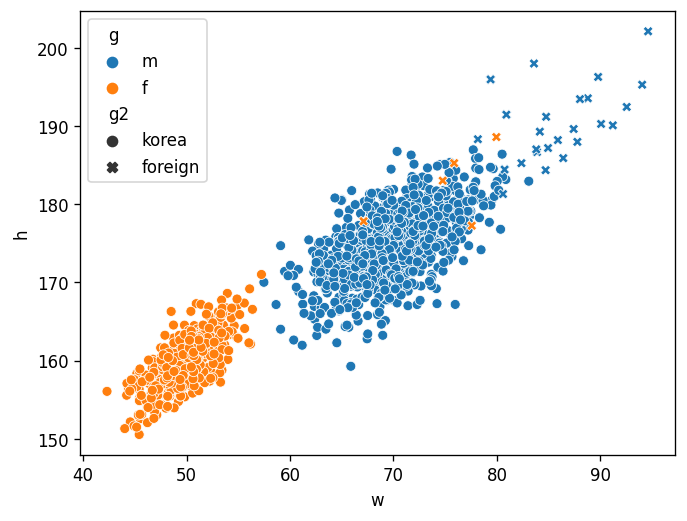

In [30]:
sns.scatterplot(
    data=df,
    x='w',
    y='h',
    hue='g',
    style='g2'
)

`-` 어려운 점: 

1. 센스부족: 센스가 없어서 hue/style을 이용하여 그룹을 구분할 생각을 못함
2. 개념부족: 타이디데이터 (=tidy dataframe, long form dataframe) 형태로 데이터를 정리할 생각을 못함
3. 코딩못함: 타이디데이터로 데이터를 변형하는 코드를 모름 

`-` 해결하는 방법:

1. 센스부족: 훌륭한 시각화를 많이 보면 해결할 수 있음. 
2. 개념부족: tidydata에 대한 개념을 배우면 해결할 수 있음. 
3. 코딩못함: 코딩공부열심히 (시각화 코드가 중요한게 아니고, pandas를 엄청 잘해야함)

# 4. 숙제

아래의 코드로 df를 불러오라. 

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")

아래와 같은 그림을 그려서 제출하라. 

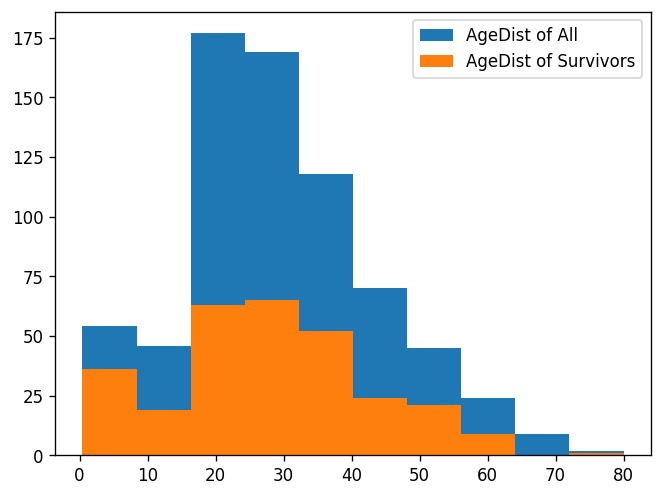

In [37]:
#

**힌트**

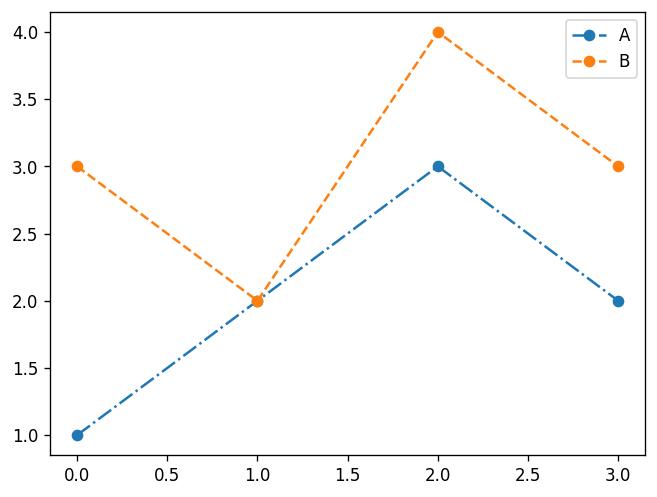

In [42]:
plt.plot([1,2,3,2],'-.o',label='A')
plt.plot([3,2,4,3],'--o',label='B')
plt.legend()